## WordCloud for Global_headlines_df and Indian_Title_df

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
# Load in the dataframe
df = pd.read_csv("global_headlines_df.csv", index_col=0)

In [58]:
df.head()

,date,articleid,headline,compound_vader_score
0,1991-11-14 00:00:00+00:00,wsj_398284048,Banking Bill Negotiators Set Compromise --- Pl...,0.2960
1,1986-06-16 00:00:00+00:00,wsj_397959018,Manager's Journal: Sniffing Out Drug Abusers I...,-0.7003
2,2001-05-24 00:00:00+00:00,wsj_398739166,"Bank of Montreal, Royal Bank Profits Rose in 2...",0.4404
3,1986-10-22 00:00:00+00:00,wsj_397957465,Battle Over Medical Costs Isn't Over,-0.3818
4,2005-12-08 00:00:00+00:00,wsj_399004010,"Dow Falls 45.95, Late GM Surge Stanches Losses",-0.4019


In [59]:
def create_wordcloud(category):
    text = " ".join(review for review in df.headline)
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'white', stopwords = STOPWORDS).generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [61]:
# Count Vectorizer for entire model 
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2), stop_words = STOPWORDS)
cvector.fit(df['headline'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'also', 'am', 'an', 'and', 'any', 'are',
                            "aren't", 'as', 'at', 'be', 'because', 'been',
                            'before', 'being', 'below', 'between', 'both',
                            'but', 'by', 'can', "can't", 'cannot', 'com', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### WordCloud for Global_headlines_df

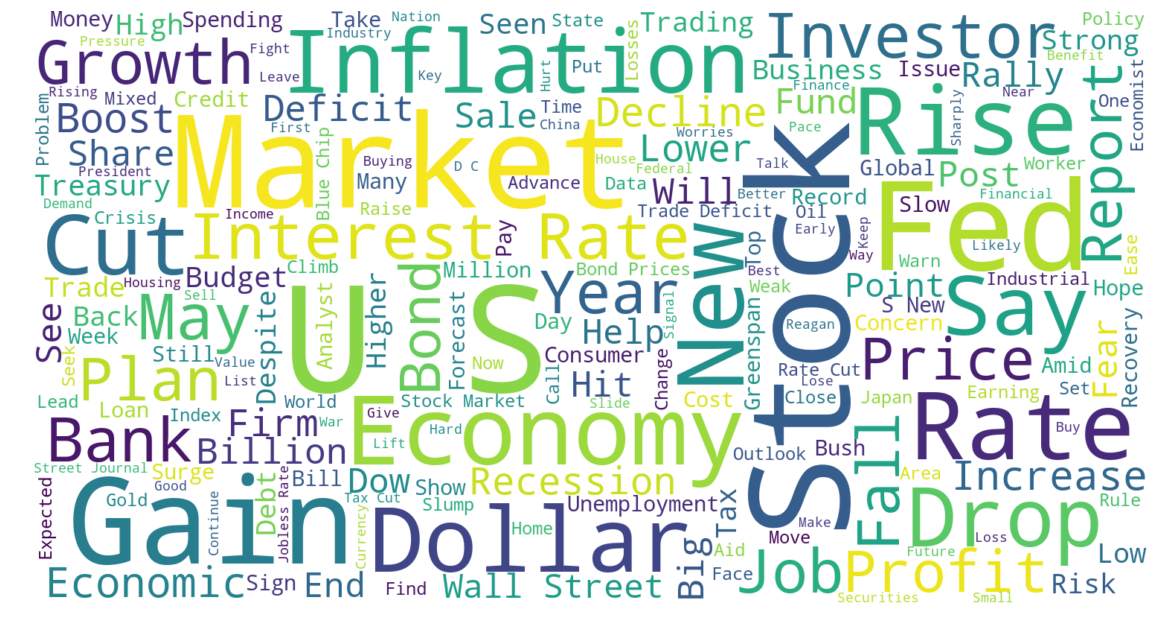

In [62]:
create_wordcloud('category')

In [63]:
def create_term_freq(matrix):
    category_words = matrix.sum(axis=0)
    category_words_freq = [(word, category_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
    return pd.DataFrame(list(sorted(category_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms', 'Frequency'])

In [66]:

# Load in the dataframe
df = pd.read_csv("Indian_title_df.csv", index_col=0)

In [67]:
df.head()

,Date,Title,compound_vader_score
0,2020-05-26 00:00:00+00:00,"ATMs to become virtual bank branches, accept d...",0.6369
1,2020-05-26 00:00:00+00:00,IDFC First Bank seniors to forgo 65% of bonus ...,-0.1531
2,2020-05-25 00:00:00+00:00,"Huge scam in YES Bank for many years, says Enf...",0.2577
3,2020-05-23 00:00:00+00:00,DCB Bank's profit before tax declines 37.6% to...,0.4404
4,2020-05-22 00:00:00+00:00,"Retail, MSME loans to get cheaper as RBI cuts ...",-0.0258


In [68]:
def create_wordcloud(category):
    text = " ".join(review for review in df.Title)
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'white', stopwords = STOPWORDS).generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [71]:
# Count Vectorizer for entire model 
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2), stop_words = STOPWORDS)
cvector.fit(df['Title'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'also', 'am', 'an', 'and', 'any', 'are',
                            "aren't", 'as', 'at', 'be', 'because', 'been',
                            'before', 'being', 'below', 'between', 'both',
                            'but', 'by', 'can', "can't", 'cannot', 'com', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

## WordCloud for Indian_Title_df

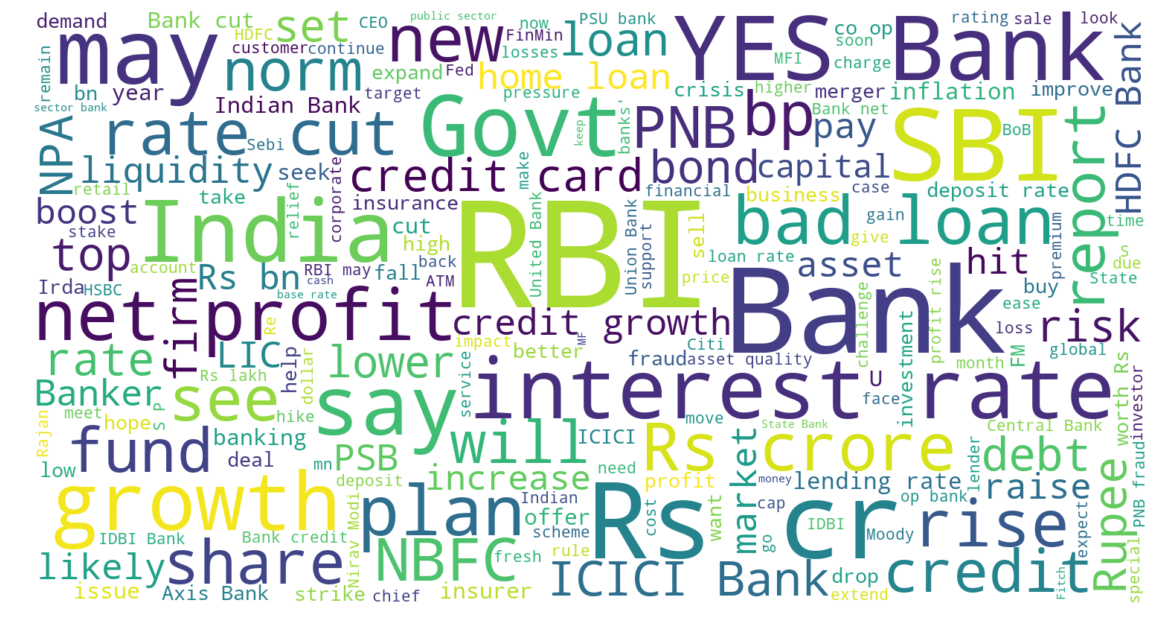

In [72]:
create_wordcloud('category')

#### The wordcloud for both the dataframes are created. The top 10 words from the wordcloud of both the dataframes are documented in the final thesis

